In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors

In [37]:
# KNN Imputation: KNN imputer not KNN classifier for that
# KNN is a lazy learner

In [38]:
df=sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [39]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [40]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [42]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [43]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

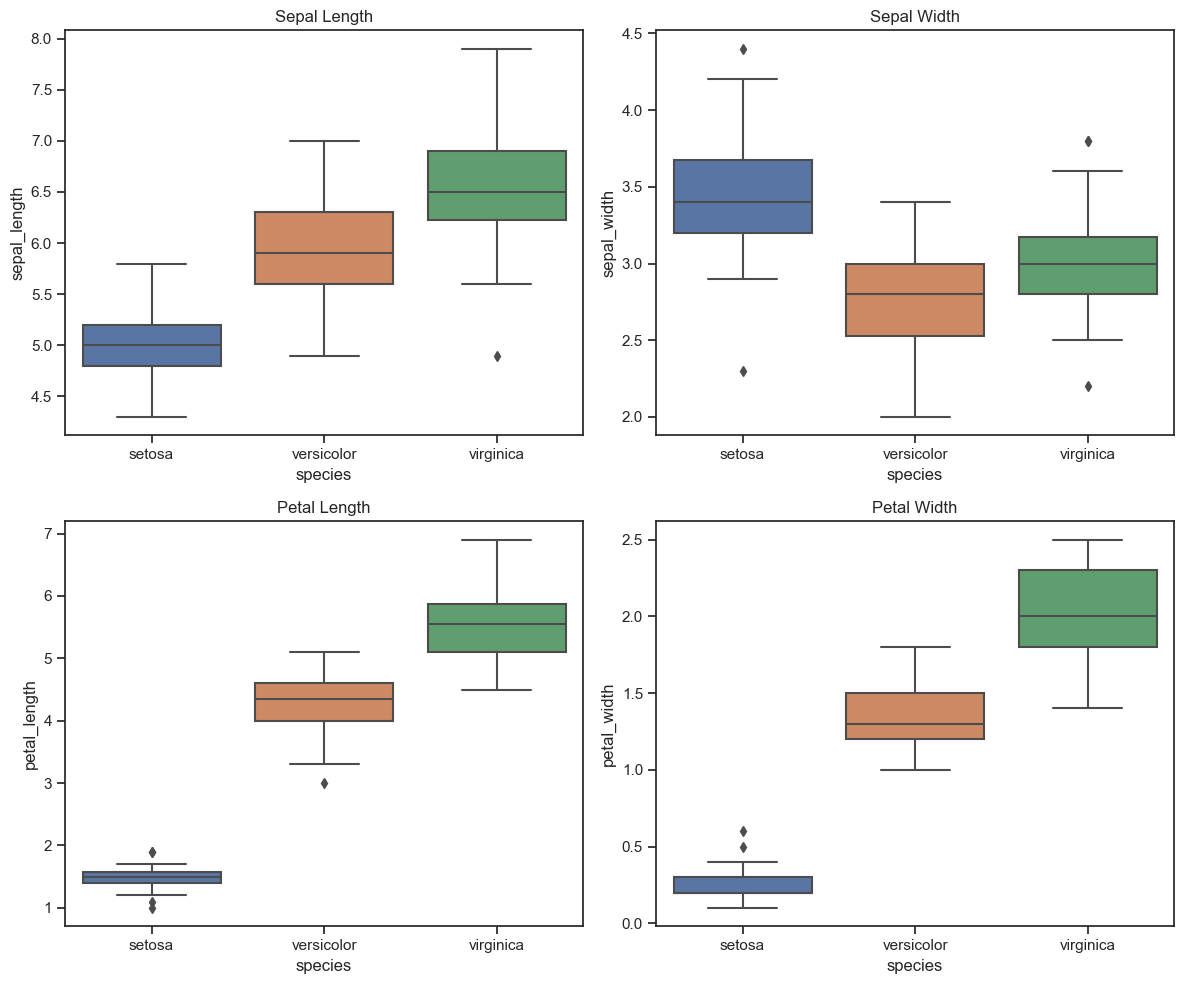

In [44]:
sns.set(style='ticks')
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x="species", y="sepal_length", data=df)
plt.title('Sepal Length')

plt.subplot(2, 2, 2)
sns.boxplot(x="species", y="sepal_width", data=df)
plt.title('Sepal Width')

plt.subplot(2, 2, 3)
sns.boxplot(x="species", y="petal_length", data=df)
plt.title('Petal Length')

plt.subplot(2, 2, 4)
sns.boxplot(x="species", y="petal_width", data=df)
plt.title('Petal Width')

plt.tight_layout()
plt.show()


In [45]:
X=df.iloc[:,:4]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [46]:
y=df['species']

In [47]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [48]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=20,stratify=y)

In [26]:
# Very important to determine the value of k
# Elbow method to determine value of k 
# After that we apply cross validation to fine tune

In [49]:
#KNN works based on distance
# So it is important to standardize the data before training 
# Scaling is advised whenever we use distance based algorithms

In [52]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_val)

array([[ 1.18652219, -0.53831098,  0.58626573,  0.27556001],
       [ 1.06524224,  0.16638703,  0.35877378,  0.27556001],
       [-1.11779688, -1.47790834, -0.26682911, -0.25564001],
       [ 0.21628258, -0.06851231,  0.58626573,  0.80676004],
       [-0.99651693,  0.87108505, -1.23366993, -1.05244006],
       [-1.11779688,  0.16638703, -1.29054292, -1.45084008],
       [-0.14755727, -1.00810966, -0.15308313, -0.25564001],
       [-0.14755727, -0.06851231,  0.2450278 ,  0.00996   ],
       [ 0.45884248,  0.87108505,  0.92750367,  1.47076008],
       [ 0.70140238, -0.30341164,  0.30190079,  0.14276001],
       [ 0.33756253, -0.06851231,  0.64313872,  0.80676004],
       [ 0.58012243,  0.63618571,  0.52939275,  0.54116003],
       [ 1.67164199,  1.34088372,  1.3256146 ,  1.73636009],
       [-0.75395703,  0.87108505, -1.34741591, -1.31804007],
       [ 1.18652219, -0.06851231,  0.98437666,  1.20516007],
       [ 2.52060165,  1.8106824 ,  1.49623357,  1.07236006],
       [-0.99651693,  0.

In [53]:
# We fit transform X_train
# We transform X_test
# We dont scale the classes(y_train and y_val)

In [54]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [56]:
y_pred=knn.predict(X_val)

In [58]:
result = confusion_matrix(y_val,y_pred)
print("Confusion Matrix: ")
print(result)

Confusion Matrix: 
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


In [62]:
classification_report=classification_report(y_val,y_pred)
print("Classification report:")
print(classification_report)

Classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [63]:
accuracy = accuracy_score(y_val,y_pred)
accuracy

0.9666666666666667

In [74]:
f1_score_value = f1_score(y_val, y_pred,average='macro')
print("F1 Score:", f1_score_value)

F1 Score: 0.9665831244778613


In [71]:
# In the context of calculating the F1 score for a multiclass classification problem, specifying average='macro' means that the F1 score is computed independently for each class, and then the unweighted average (arithmetic mean) of these individual class F1 scores is taken to obtain the final score.

In [78]:
f1_list=[]
k_list=[]
for k in range(1,10):
    clf=neighbors.KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    clf.fit(X_train,y_train)
    pred=clf.predict(X_val)
    f=f1_score(y_val,pred,average="macro")
    f1_list.append(f)
    k_list.append(k)

In [79]:
# n_jobs=-1 allows the algorithm to utilize all available CPU cores for parallel computation during the training of the K-nearest neighbors classifier (clf.fit()), potentially speeding up the process.

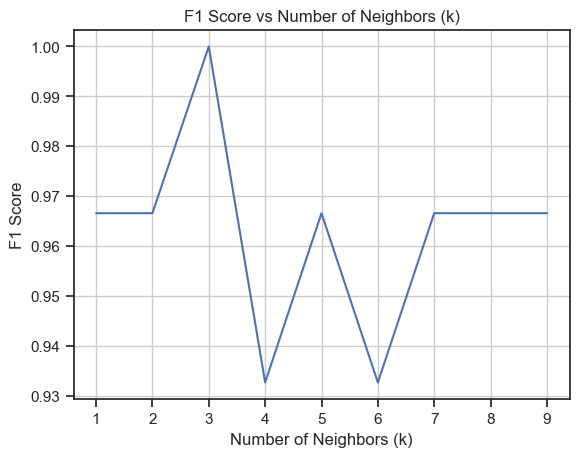

In [81]:
# Higher the f1-score the better the model
plt.plot(k_list, f1_list)
plt.title('F1 Score vs Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('F1 Score')
plt.xticks(k_list)
plt.grid()
plt.show()

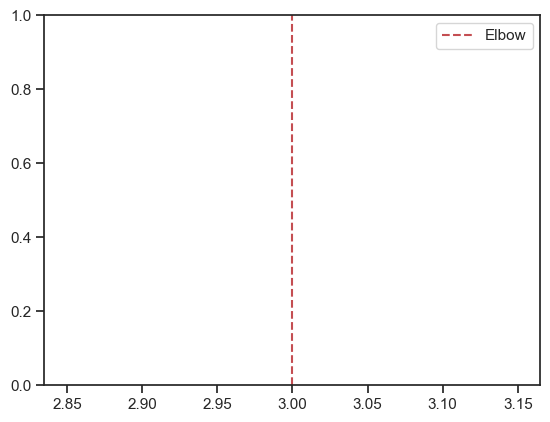

In [82]:
plt.axvline(x=k_list[f1_list.index(max(f1_list))], color='r', linestyle='--', label='Elbow')
plt.legend()

plt.show()

In [83]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [84]:
y_pred_1=knn.predict(X_val)

In [85]:
accuracy_1 = accuracy_score(y_val,y_pred_1)
accuracy_1

1.0

In [86]:
f1_score_1 = f1_score(y_val, y_pred_1,average='macro')
print("F1 Score:", f1_score_1)

F1 Score: 1.0
